In [1]:
import requests, json, time, pandas as pd
from keys import lastfm_api_key as key, lastfm_user_name as username
from tqdm import tqdm

C:\Users\Danny\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# how long to pause between consecutive API requests
pause_duration = 0.2

In [3]:
url = 'http://ws.audioscrobbler.com/2.0/?method=artist.getInfo&mbid={}&user=RJ&api_key={}&format=json'

In [4]:
scrobbles = pd.read_csv("./data/lastfm_scrobbles.csv")

In [5]:
scrobbles.groupby('artist').first()

,artist_mbid,album,album_mbid,track,track_mbid,timestamp,datetime
artist,,,,,,,
"""Weird Al"" Yankovic",7746d775-9550-4360-b8d5-c37bd448ce01,Running With Scissors,3179b51f-fb47-35f7-8739-bc4c5a1c488f,Internet Sandman,NaN,1473107356,05/09/2016 20:29
*Compilations,NaN,Dream of the Mistress,NaN,After Forever - Glorifying Means,NaN,1473676433,12/09/2016 10:33
2 Unlimited,622bbe24-b848-409b-9f2e-f0fb04df4af0,Hits Unlimited,0eccc015-d5a7-3c9f-a704-f45343950d57,Get Ready For This,4238d342-c4ba-43b1-8247-55257bd1d453,1395771600,25/03/2014 18:20
3 Doors Down,2386cd66-e923-4e8e-bf14-2eebe2e9b973,Seventeen Days,3c23b5cd-3245-34f6-84b5-6984655c142b,Behind Those Eyes,81dcb4f7-3fb8-40f6-861b-7f67aab0b37e,1480975794,05/12/2016 22:09
30 Seconds to Mars,d8354b38-e942-4c89-ba93-29323432abc3,This Is War,6221bd54-033d-4876-b722-736b4e95686b,Night of the Hunter,233fc194-8482-43e0-beb2-51704d613887,1487274535,16/02/2017 19:48
A Day to Remember,db008806-16f6-48fc-8521-3d953709689d,Homesick (Special Edition),e315cb82-c4a4-4c26-ade5-4fda93af2d5e,NJ Legion Iced Tea,f23247f9-747b-437b-8490-7d04c560956d,1489712105,17/03/2017 00:55
AC/DC,66c662b6-6e2f-4930-8610-912e24c63ed1,Warning! High Voltage (Greatest Hits) CD1,NaN,Stiff Upper Lip,d84428fe-ec19-4c17-96bd-ef5aa3186cef,1485891336,31/01/2017 19:35
ATB,22a096ef-c70d-4d70-ae19-4fc2412d4986,Fresh FM 90's Dance!,NaN,Don't Stop,56ad2eba-2479-4474-b226-2f4dd7c6b2ad,1488574414,03/03/2017 20:53
Abney Park,81f8edef-a337-4588-a362-7511ef1b0fa2,Aether Shanties,NaN,Until the Day You Die,3012c385-be34-4ca1-a740-834129cb9572,1458403744,19/03/2016 16:09


In [6]:
genres = {}
for artist_name, row in tqdm(scrobbles.groupby('artist').first().iterrows(), total=len(scrobbles.groupby('artist').first())):
    try:
        request_url = url.format(row.artist_mbid, key)
        response = requests.get(request_url).json()
        time.sleep(pause_duration)
        genres[row.artist_mbid] = [element['name'] for element in response['artist']['tags']['tag']]
    except:
        pass

100%|████████████████████████████████████████| 521/521 [14:40<00:00,  1.52it/s]


In [7]:
s = pd.Series(genres)

In [8]:
genre_df = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)#.sum().sort_values()

In [9]:
genre_df = genre_df / 5

In [10]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Myriad Pro'
plt.rcParams['text.color'] = '#555555'

Populating the interactive namespace from numpy and matplotlib


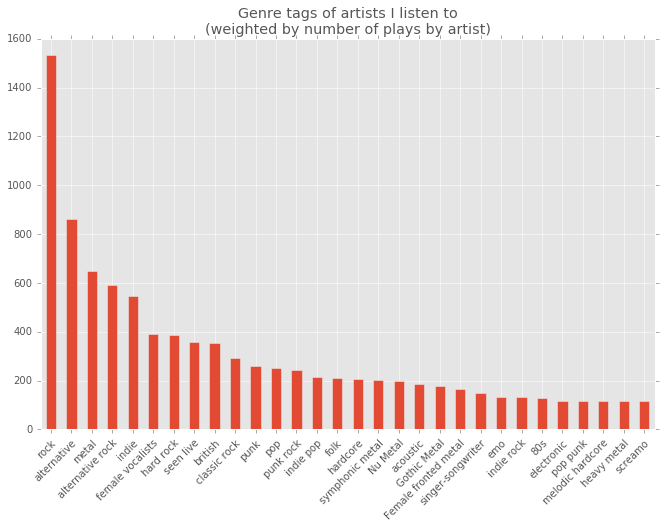

In [29]:
temp_s = scrobbles.groupby('artist_mbid').size()
temp_s.name = 'plays'
genre_df.mul(temp_s, axis=0).sum(axis=0).sort_values(ascending=False)[:30].plot(kind='bar', figsize=[11, 7])
plt.title('Genre tags of artists I listen to\n(weighted by number of plays by artist)')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
None
plt.savefig('images/lastfm-genres.png', dpi=96, bbox_inches='tight')

In [12]:
# Add genre analysis by year

In [13]:
scrobbles.album_mbid.value_counts().count()

522

In [14]:
#Albums
url = 'http://musicbrainz.org/ws/2/release/{}?inc=aliases&fmt=json'
album_release_year = {}
for album_name, row in tqdm(scrobbles.groupby('album').first().album_mbid.dropna().iteritems(), total=len(scrobbles.groupby('album').first().album_mbid.dropna())):

    try:
        request_url = url.format(row)
        response = requests.get(request_url).json()
        time.sleep(pause_duration)
        album_release_year[row] = response['date']
    except:
        pass
        


100%|████████████████████████████████████████| 508/508 [02:33<00:00,  3.24it/s]


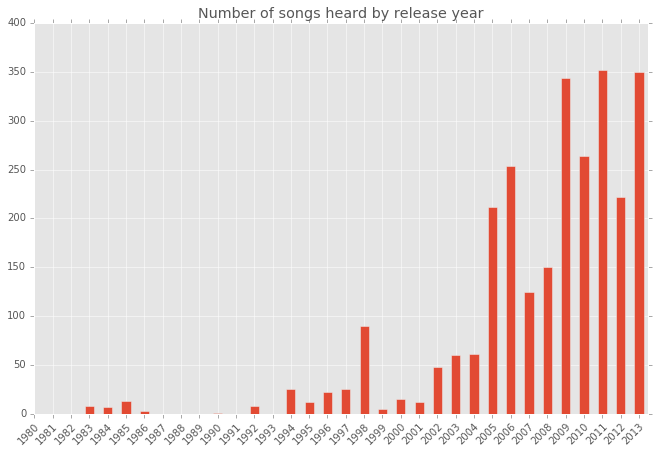

In [26]:
(scrobbles.album_mbid.map(album_release_year).dropna()).apply(pd.to_datetime).dt.year.value_counts().sort_index().loc[range(1980,2017)].fillna(0).plot(kind='bar', figsize=[11, 7])
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
plt.xlim(0,33.5)
plt.title('Number of songs heard by release year')
None

In [16]:
#Songs
response = requests.get("http://musicbrainz.org/ws/2/recording/80ab50e7-70b3-4cd8-9c97-6c4b609a0c38?inc=artist-credits+isrcs+releases&fmt=json").json()
response['releases'][-1]['date']

url = 'http://musicbrainz.org/ws/2/recording/{}?inc=artist-credits+isrcs+releases&fmt=json'
song_release_year = {}
for album_name, row in tqdm(scrobbles.groupby('track').first().track_mbid.dropna().iteritems(), total=len(scrobbles.groupby('track').first().track_mbid.dropna())):

    try:
        request_url = url.format(row)
        response = requests.get(request_url).json()
        time.sleep(pause_duration)
        song_release_year[row] = response['releases'][-1]['date']
    except:
        pass

100%|██████████████████████████████████████| 2882/2882 [15:26<00:00,  3.29it/s]


In [17]:
song_release_year

{'000c384f-6586-4565-890a-58daeb551577': u'2003-12-01',
 '000e6c92-d540-4010-9557-815a2c1a747a': u'2013-01-08',
 '003147d4-c9f1-4b93-b259-c9ec16485579': u'2009-03-20',
 '009cf748-0142-4355-a001-60e2ff29d1bb': u'2014-10-06',
 '009f7e7b-5ecf-4cef-a2c1-0f0c736e807e': u'1999',
 '00bd8820-f19e-4459-a3e6-0390ada318cc': u'2002-04-02',
 '00cc606d-4924-4322-83fa-5de9067a7e80': u'2008-03-11',
 '00cfa495-ef70-48c2-b24e-01a73874c3a0': u'2009',
 '0117cfac-d7bd-439c-998d-142a6bd07756': u'2011-08-16',
 '0132c290-1010-4524-9f16-3493f818000f': u'2001',
 '017830c1-d1cf-46f3-8801-aaaa0a930223': u'2015-11-13',
 '019b8694-3af1-4c0a-956f-4b8ea7f8a112': u'2006',
 '01e1696b-b3c7-4ffe-a42b-ec2c952f7429': u'1986',
 '0294db7f-d7b6-4bdd-a9a5-c2033bbb4436': u'2006-01-06',
 '02bfc1cd-7587-4886-bf13-3f970a676a7d': u'2009-10-26',
 '02fbf6f9-f5ca-4e9c-bb2f-7aa4ebcf1fbc': u'2014-01-22',
 '0322d733-8008-44f5-9448-bfb455079b80': u'2015-02-06',
 '036ba48a-5ef5-455b-8d35-e757ce60dac1': u'2000-11-10',
 '039372c0-3c46-4dbd-9

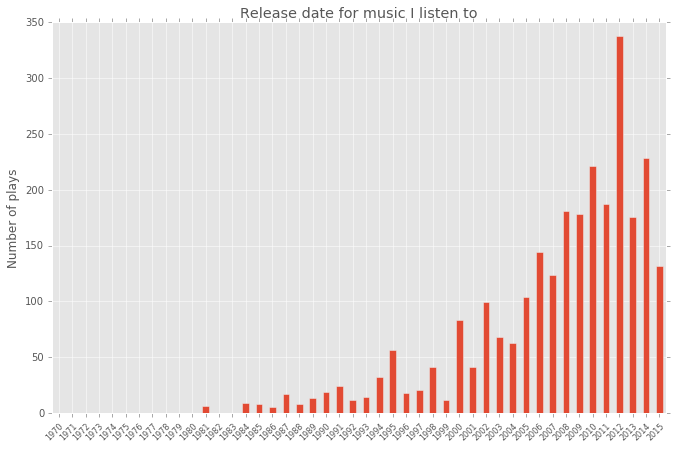

In [30]:
(scrobbles.track_mbid.map(song_release_year).dropna()).apply(pd.to_datetime).dt.year.value_counts().sort_index().loc[range(1970,2017)].fillna(0).plot(kind='bar', figsize=[11, 7])
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right', size=8)
None
plt.title('Release date for music I listen to')
plt.ylabel('Number of plays')
plt.xlim(-0.5,45.5)
plt.savefig('images/lastfm-songs-release-year.png', dpi=96, bbox_inches='tight')